Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by linear regression using Deep Neural network. 
Use Boston House price prediction dataset.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [2]:
df=pd.read_csv("boston_housing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.shape

(506, 14)

In [4]:
df.size

7084

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [6]:
df.isna().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
'''
import pandas as pd

# Correct column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 
                'LSTAT', 'MEDV']

# Load your file
df = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=column_names)

# Check
print(df.head())
'''

"\nimport pandas as pd\n\n# Correct column names\ncolumn_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', \n                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', \n                'LSTAT', 'MEDV']\n\n# Load your file\ndf = pd.read_csv('housing.csv', delim_whitespace=True, header=None, names=column_names)\n\n# Check\nprint(df.head())\n"

In [13]:
# 2. Prepare the Data
X = df.drop('MEDV', axis=1)  # Features (all columns except 'MEDV')
y = df['MEDV'] 

In [14]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# 4. Standardize (important for Neural Networks!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 5. Build the Deep Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# 6. Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
# 7. Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 619.9446 - mae: 23.0129 - val_loss: 529.0042 - val_mae: 21.4099
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 578.8482 - mae: 21.9922 - val_loss: 490.5363 - val_mae: 20.4774
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 540.3708 - mae: 21.1992 - val_loss: 441.6888 - val_mae: 19.2635
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 489.2173 - mae: 19.6681 - val_loss: 378.9661 - val_mae: 17.5949
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 399.9236 - mae: 17.9039 - val_loss: 301.9818 - val_mae: 15.4058
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 305.5857 - mae: 15.0671 - val_loss: 216.2069 - val_mae: 12.6559
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 222.3361 - mae: 12.3631 - val_loss: 133.8455 - val_mae: 9.3427
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 125.3004 - mae: 8.9234 - val_loss: 77.5451 - val_mae: 6.3509
Epoch 9/10
11/11 ━━━━━━━━━━

In [20]:
# 8. Evaluate the model
'''
Optional Parameter for evaluate():
batch_size: The batch size to use for evaluation. If not provided, the default is 32.

verbose: The verbosity mode (0 = silent, 1 = progress bar)
'''
test_mse, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.2012 - mae: 3.8813 

Test Mean Absolute Error (MAE): 4.23


In [21]:
# 9. Predict some house prices
y_pred = model.predict(X_test)
print("\nPredicted House Prices:\n", y_pred.flatten()[:10])  # Showing first 10 predictions

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predicted House Prices:
 [22.784624  30.997519  20.140362  27.622122  16.796535  15.10945
 12.944707  16.518818  14.719863  13.7229185]


<Axes: >

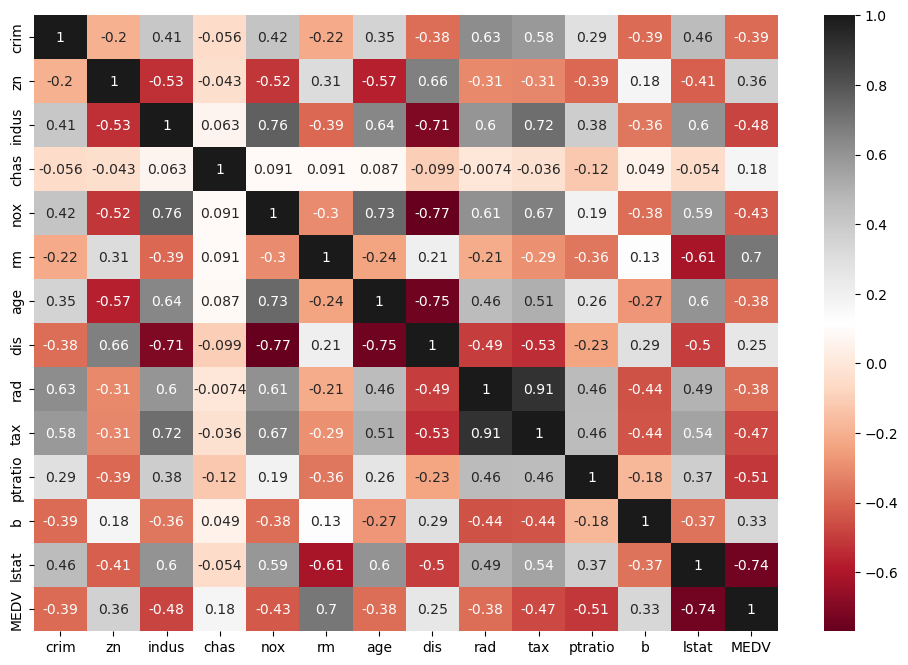

In [22]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="RdGy")

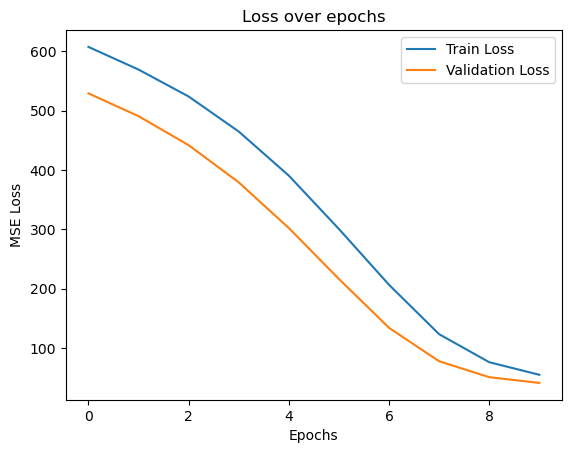

In [23]:
import matplotlib.pyplot as plt

# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


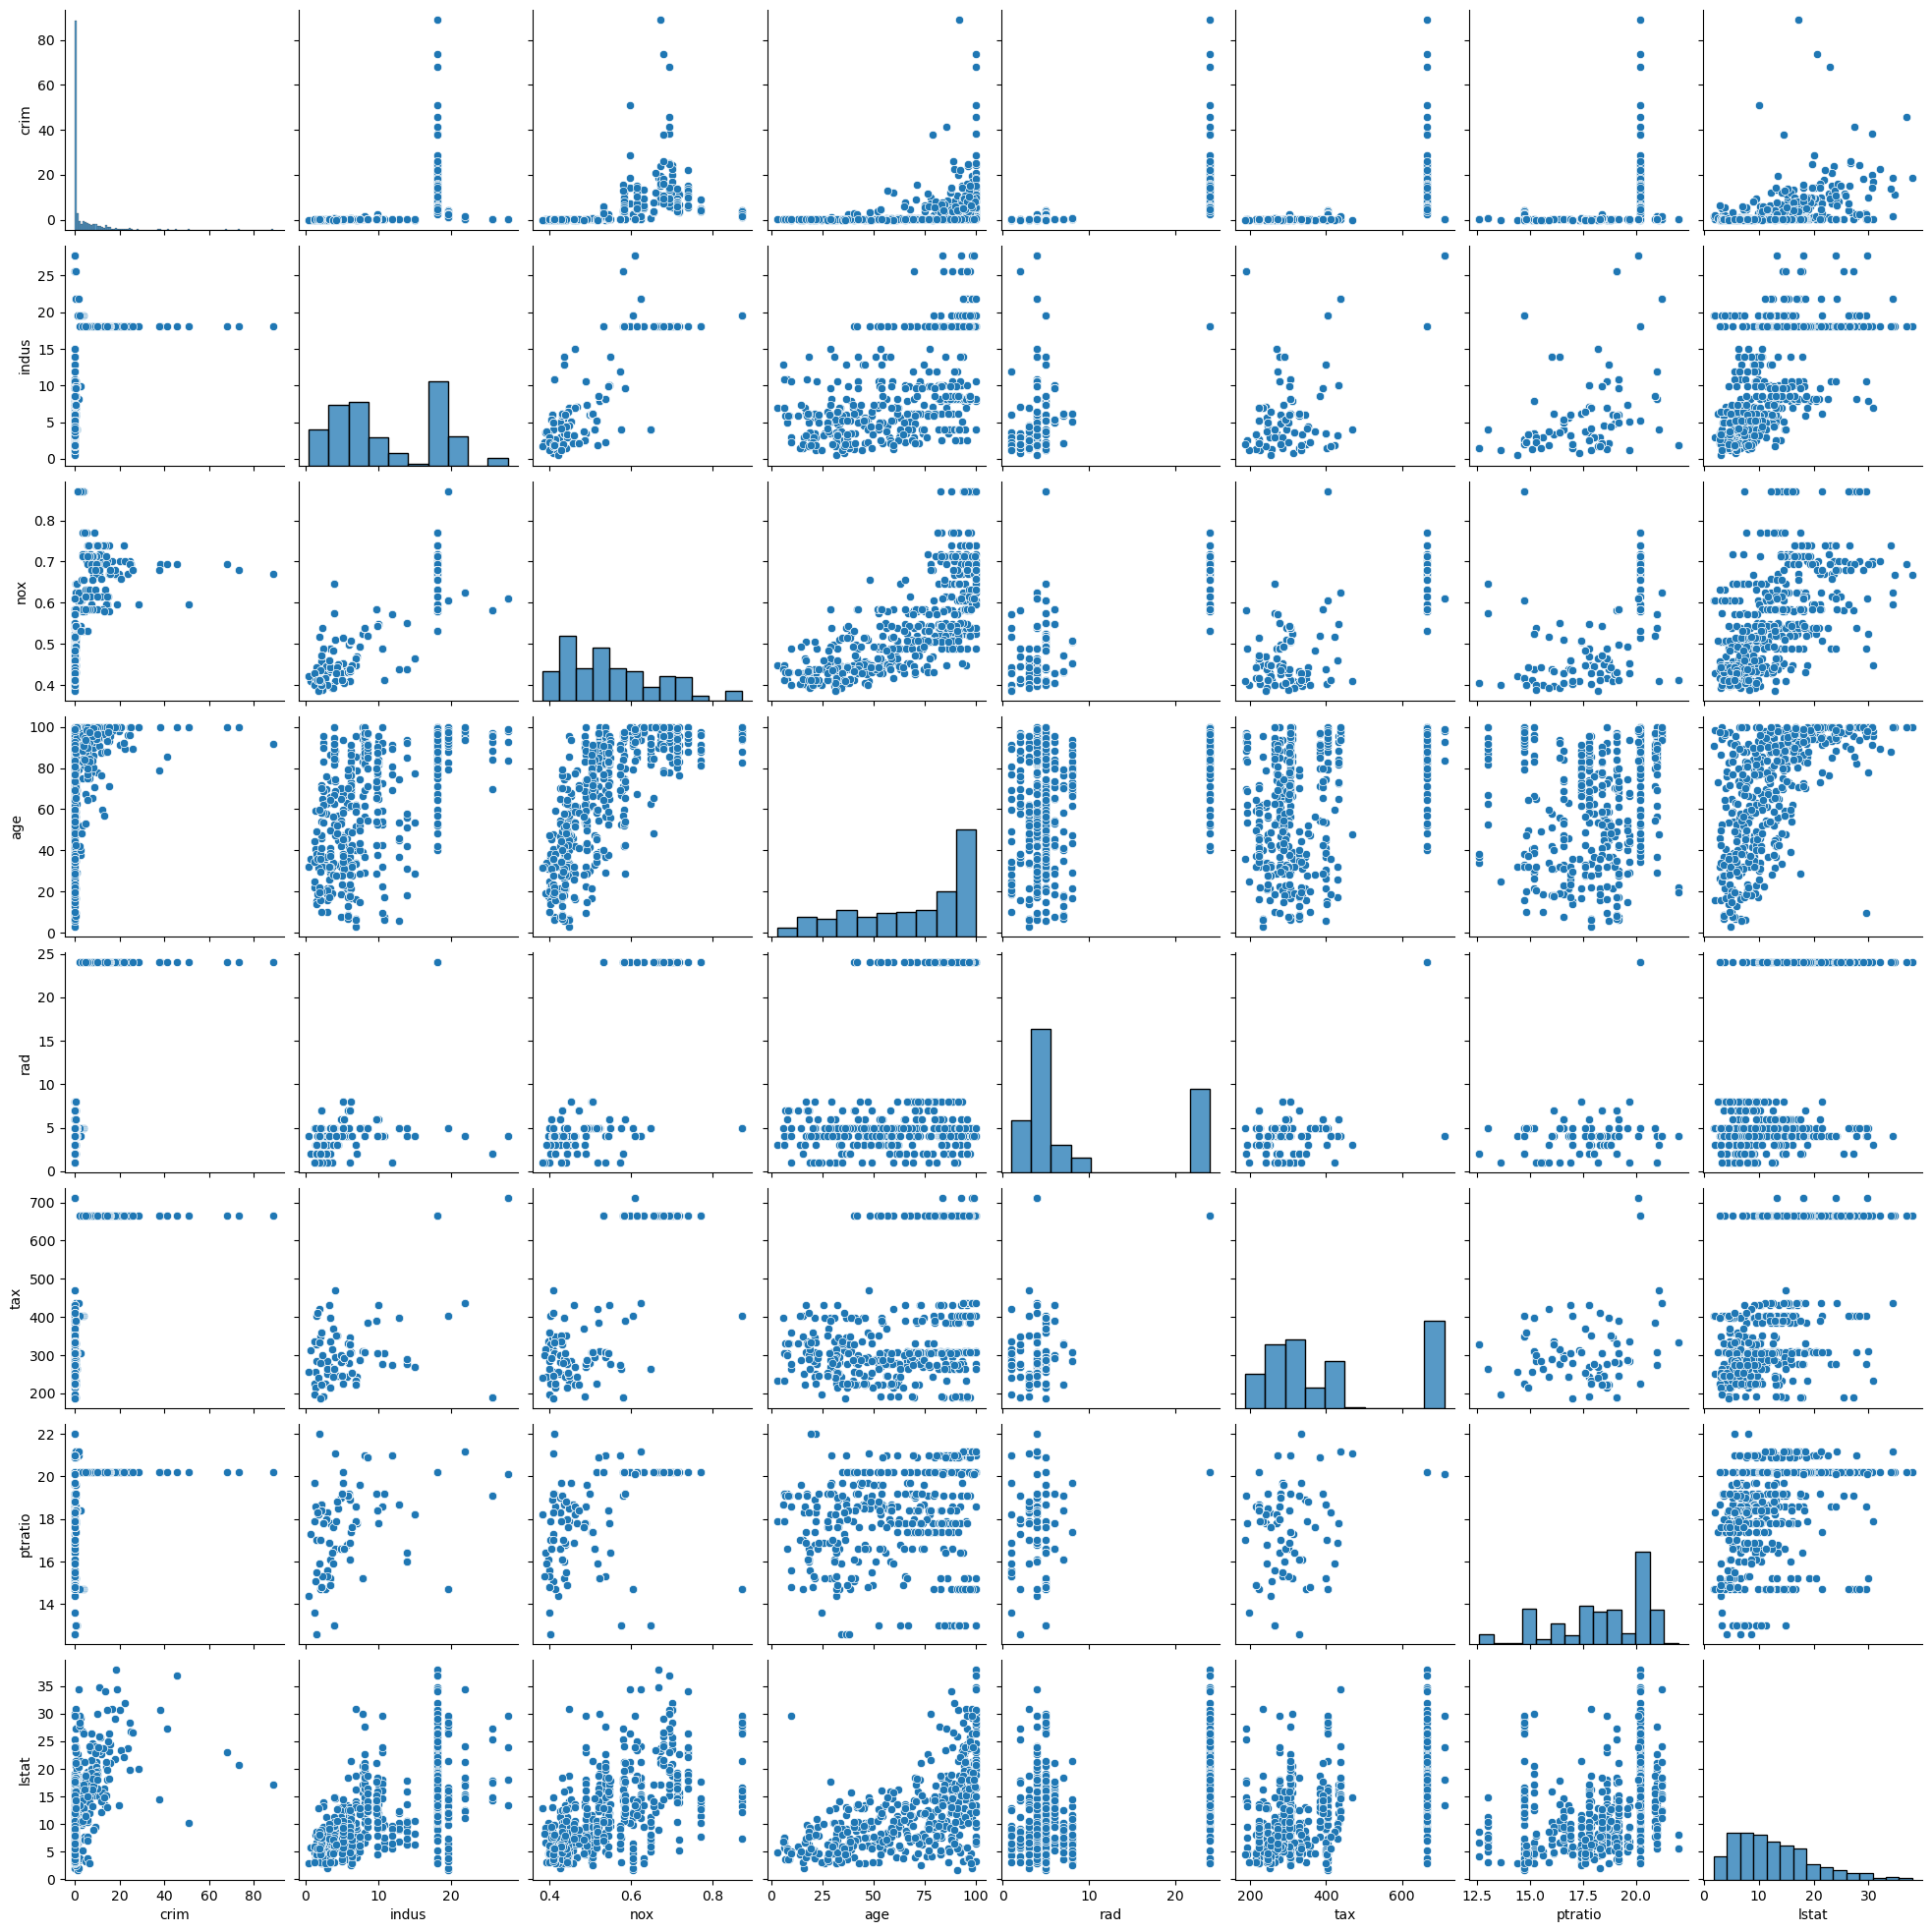

In [24]:
sns.pairplot(df, vars=['crim', 'indus', 'nox', 'age', 'rad', 'tax', 'ptratio', 'lstat'])


Text(0, 0.5, 'Y Predicted')

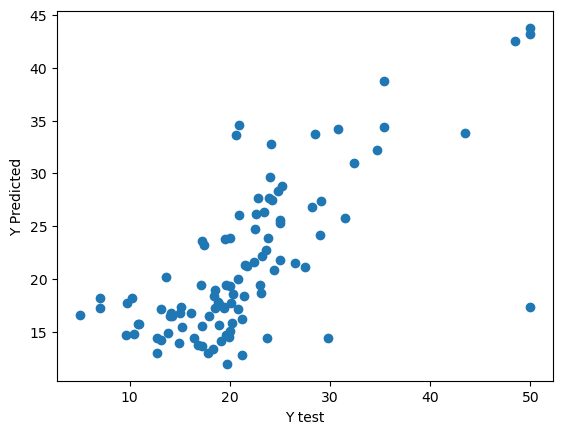

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y test")
plt.ylabel("Y Predicted")
